In [ ]:
!pip install datasets
!pip install transformers

from transformers import AutoTokenizer, AutoModel
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

raw_datasets = load_dataset("Gholamreza/pquad")
bert_tokenizer = AutoTokenizer.from_pretrained('HooshvareLab/bert-fa-base-uncased')
albert_tokenizer = AutoTokenizer.from_pretrained('HooshvareLab/albert-fa-zwnj-base-v2')

train_data: Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 63994
}),  mult_ans: 0, sin_ans: 48273, no_ans: 15721  
validation_data: Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 7976
}),  mult_ans: 2054, sin_ans: 3941, no_ans: 1981  
test_data: Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 8002
}),  mult_ans: 1769, sin_ans: 4319, no_ans: 1914  


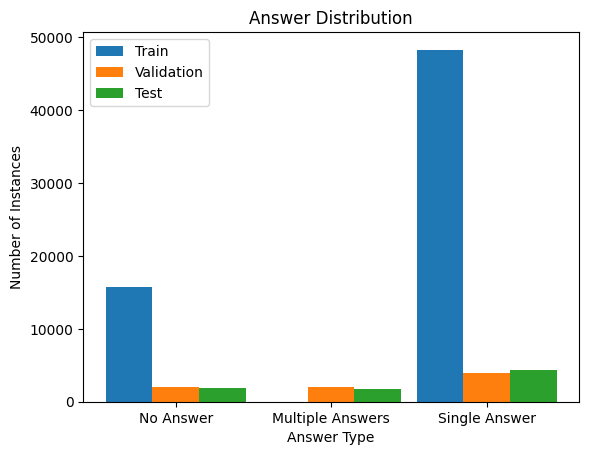

In [6]:
def num_ans(data):
   mult_ans = []
   no_ans = []
   sin_ans = []
   for idx, i in enumerate(raw_datasets[data]):
     if len(i['answers']['text']) == 1:
       sin_ans.append(idx)
     elif len(i['answers']['text']) == 0:
       no_ans.append(idx)
     else:
       mult_ans.append(idx)
   return mult_ans,sin_ans,no_ans
   
multi,sin,no=num_ans('train')
train_no_ans = len(no)
train_mult_ans = len(multi)
train_sin_ans = len(sin)
print(f"train_data: {raw_datasets['train']},  mult_ans: {len(multi)}, sin_ans: {len(sin)}, no_ans: {len(no)}  ")

multi,sin,no=num_ans('validation')

validation_no_ans = len(no)
validation_mult_ans = len(multi)
validation_sin_ans = len(sin)
print(f"validation_data: {raw_datasets['validation']},  mult_ans: {len(multi)}, sin_ans: {len(sin)}, no_ans: {len(no)}  ")

multi,sin,no=num_ans('test')
test_no_ans = len(no)
test_mult_ans = len(multi)
test_sin_ans = len(sin)
print(f"test_data: {raw_datasets['test']},  mult_ans: {len(multi)}, sin_ans: {len(sin)}, no_ans: {len(no)}  ")


# Plotting the bar chart
categories = ['No Answer', 'Multiple Answers', 'Single Answer']
train_data = [train_no_ans, train_mult_ans, train_sin_ans]
validation_data = [validation_no_ans, validation_mult_ans, validation_sin_ans]
test_data = [test_no_ans, test_mult_ans, test_sin_ans]

x = range(len(categories))
width = 0.3

plt.bar(x, train_data, width=width, label='Train')
plt.bar([i + width for i in x], validation_data, width=width, label='Validation')
plt.bar([i + width * 2 for i in x], test_data, width=width, label='Test')

plt.xlabel('Answer Type')
plt.ylabel('Number of Instances')
plt.title('Answer Distribution')
plt.xticks([i + width for i in x], categories)
plt.legend()

plt.show()

In [10]:
bert_tokenized_ = bert_tokenizer(raw_datasets['train']['question'], raw_datasets['train']['context'])['input_ids']
albert_tokenized = albert_tokenizer(raw_datasets['train']['question'], raw_datasets['train']['context'])['input_ids']
bert_tokenized_lens = [len(i) for i in bert_tokenized]
del bert_tokenized
albert_tokenized_lens = [len(i) for i in albert_tokenized]
del albert_tokenized

Token indices sequence length is longer than the specified maximum sequence length for this model (521 > 512). Running this sequence through the model will result in indexing errors


In [18]:
print("bert tokenized sequence (lengths): ",
      '\n   max: ', np.max(bert_tokenized_lens),
      '\n   min: ', np.min(bert_tokenized_lens), 
      '\n  mean: ', np.mean(bert_tokenized_lens),
      '\nmedian: ', np.median(bert_tokenized_lens),)

print('\n')

print("albert tokenized sequence (lengths): ",
      '\n   max: ', np.max(albert_tokenized_lens),
      '\n   min: ', np.min(albert_tokenized_lens), 
      '\n  mean: ', np.mean(albert_tokenized_lens),
      '\nmedian: ', np.median(albert_tokenized_lens),)


bert tokenized sequence (lengths):  
   max:  368 
   min:  19 
  mean:  163.58250773510017 
median:  160.0


albert tokenized sequence (lengths):  
   max:  530 
   min:  23 
  mean:  198.12285526768136 
median:  193.0


Text(0.5, 1.0, 'albert tokenized sequences lenghts histogram')

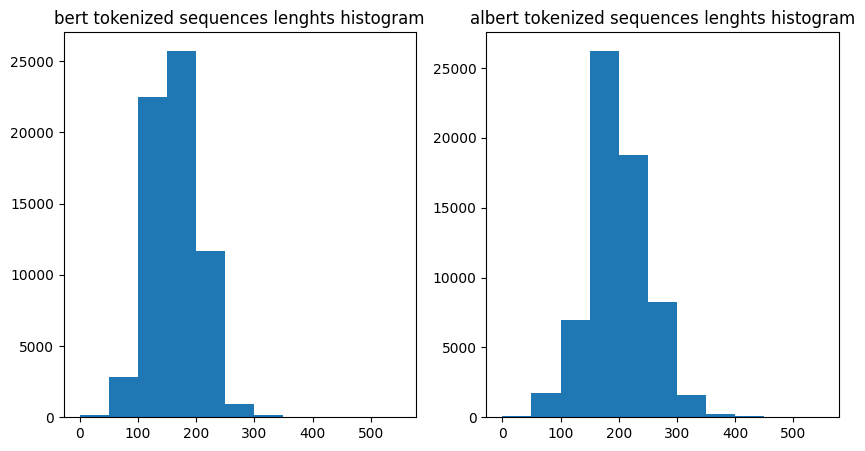

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(bert_tokenized_lens, bins= [0,50,100,150,200,250,300,350,400,450,500,550])
axs[0].set_title('bert tokenized sequences lenghts histogram')
axs[1].hist(albert_tokenized_lens, bins= [0,50,100,150,200,250,300,350,400,450,500,550])
axs[1].set_title('albert tokenized sequences lenghts histogram')